## Conditional GAN (CTGAN)

### A deep learning-based method for generating synthetic tabular data from real data

## How does CTGAN work?

### Read original paper [Modeling Tabular Data using Conditional GAN](https://proceedings.neurips.cc/paper_files/paper/2019/file/254ed7d2de3b23ab10936522dd547b78-Paper.pdf)


In [1]:
from sdv.datasets.demo import get_available_demos

get_available_demos(modality="single_table")

,dataset_name,size_MB,num_tables
0,KRK_v1,0.06,1
1,adult,3.91,1
2,alarm,4.52,1
3,asia,1.28,1
4,census,98.17,1
5,census_extended,4.95,1
6,child,3.20,1
7,covtype,255.65,1
8,credit,68.35,1
9,expedia_hotel_logs,0.20,1


### Download `student_placements` demo dataset


In [16]:
from sdv.datasets.demo import download_demo

data, metadata = download_demo(
    modality="single_table", dataset_name="student_placements"
)

In [17]:
data.keys()

Index(['student_id', 'gender', 'second_perc', 'high_perc', 'high_spec',
       'degree_perc', 'degree_type', 'work_experience', 'experience_years',
       'employability_perc', 'mba_spec', 'mba_perc', 'salary', 'placed',
       'start_date', 'end_date', 'duration'],
      dtype='object')

In [18]:
data.head()

,student_id,gender,second_perc,high_perc,high_spec,degree_perc,degree_type,work_experience,experience_years,employability_perc,mba_spec,mba_perc,salary,placed,start_date,end_date,duration
0,17264,M,67.00,91.00,Commerce,58.00,Sci&Tech,False,0,55.0,Mkt&HR,58.80,27000.0,True,2020-07-23,2020-10-12,3.0
1,17265,M,79.33,78.33,Science,77.48,Sci&Tech,True,1,86.5,Mkt&Fin,66.28,20000.0,True,2020-01-11,2020-04-09,3.0
2,17266,M,65.00,68.00,Arts,64.00,Comm&Mgmt,False,0,75.0,Mkt&Fin,57.80,25000.0,True,2020-01-26,2020-07-13,6.0
3,17267,M,56.00,52.00,Science,52.00,Sci&Tech,False,0,66.0,Mkt&HR,59.43,NaN,False,NaN,NaN,NaN
4,17268,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,False,0,96.8,Mkt&Fin,55.50,42500.0,True,2020-07-04,2020-09-27,3.0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          215 non-null    int64  
 1   gender              215 non-null    object 
 2   second_perc         215 non-null    float64
 3   high_perc           215 non-null    float64
 4   high_spec           215 non-null    object 
 5   degree_perc         215 non-null    float64
 6   degree_type         215 non-null    object 
 7   work_experience     215 non-null    bool   
 8   experience_years    215 non-null    int64  
 9   employability_perc  215 non-null    float64
 10  mba_spec            215 non-null    object 
 11  mba_perc            215 non-null    float64
 12  salary              148 non-null    float64
 13  placed              215 non-null    bool   
 14  start_date          148 non-null    object 
 15  end_date            148 non-null    object 
 16  duration

### Student Placement dataset has NULL values


In [20]:
data.isnull().sum()

student_id             0
gender                 0
second_perc            0
high_perc              0
high_spec              0
degree_perc            0
degree_type            0
work_experience        0
experience_years       0
employability_perc     0
mba_spec               0
mba_perc               0
salary                67
placed                 0
start_date            67
end_date              67
duration              67
dtype: int64

### > Load other data formats using pandas library


## Auto detect metadata from pandas df


In [21]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)

## Inspect auto-detected metadata


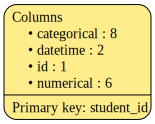

In [22]:
metadata.visualize(show_table_details="summarized", output_filepath="my_metadata.png")

In [23]:
metadata.to_dict()

{'primary_key': 'student_id',
 'columns': {'student_id': {'sdtype': 'id'},
  'gender': {'sdtype': 'categorical'},
  'second_perc': {'sdtype': 'numerical'},
  'high_perc': {'sdtype': 'numerical'},
  'high_spec': {'sdtype': 'categorical'},
  'degree_perc': {'sdtype': 'numerical'},
  'degree_type': {'sdtype': 'categorical'},
  'work_experience': {'sdtype': 'categorical'},
  'experience_years': {'sdtype': 'categorical'},
  'employability_perc': {'sdtype': 'numerical'},
  'mba_spec': {'sdtype': 'categorical'},
  'mba_perc': {'sdtype': 'numerical'},
  'salary': {'sdtype': 'numerical'},
  'placed': {'sdtype': 'categorical'},
  'start_date': {'sdtype': 'datetime', 'datetime_format': '%Y-%m-%d'},
  'end_date': {'sdtype': 'datetime', 'datetime_format': '%Y-%m-%d'},
  'duration': {'sdtype': 'categorical'}},
 'METADATA_SPEC_VERSION': 'SINGLE_TABLE_V1'}

### > Detected metadata is not detected to be complete.

### > 1. Use `set_primary_key` and `add_alternate_keys` method to update them

### > 2. Sensitive information may not be auto-detected. Look for columns with `unknown` sdtype and use `update_column` to update them


## Validating metadata


In [24]:
metadata.validate()

## Validate data


In [25]:
metadata.validate_data(data=data)

## SDV uses Synthesizer to generate synthetic data


In [26]:
from sdv.single_table import CTGANSynthesizer

synthesizer = CTGANSynthesizer(
    metadata, enforce_rounding=False, epochs=500, verbose=True  # required
)

/Users/sharattadimalla/github/synthetic-data-generation/.venv/lib/python3.9/site-packages/sdv/single_table/base.py:97: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


### Synthesizer Parameters

1. **enforce_min_max_values:** enforce min max values in real data. Use constraints to set custom limits
2. **enforce_rounding:** control whether the synthetic data should have the same number of decimals as real data
3. **epochs:** number of trains to train the GAN. Each new epoch can improve the model
4. **verbose:** control whether to print out the results after each epoch
5. **cuda:** whether to use CUDA to speed up modeling time using GPU


## Train Synthesizer


In [28]:
synthesizer.fit(data)

Gen. (-0.51) | Discrim. (-0.25): 100%|██████████| 500/500 [00:32<00:00, 15.54it/s]


## Synthetic Data


In [29]:
synthetic_data = synthesizer.sample(num_rows=100)

In [31]:
synthetic_data.head()

,student_id,gender,second_perc,high_perc,high_spec,degree_perc,degree_type,work_experience,experience_years,employability_perc,mba_spec,mba_perc,salary,placed,start_date,end_date,duration
0,128867032,M,82.250641,94.341914,Commerce,77.498448,Others,True,1,78.213979,Mkt&Fin,62.953047,NaN,True,2020-06-26,NaN,3.0
1,684592517,M,61.369270,76.138236,Arts,80.804849,Comm&Mgmt,True,1,85.786719,Mkt&HR,56.021175,NaN,True,2020-01-17,2020-10-03,12.0
2,487269146,F,73.180784,70.162578,Science,71.286648,Sci&Tech,False,0,67.898984,Mkt&HR,51.210000,26648.12373,False,NaN,NaN,3.0
3,954254673,M,83.423492,88.907164,Science,57.877661,Sci&Tech,False,0,98.000000,Mkt&Fin,59.807273,20000.00000,True,2020-01-17,2020-05-21,6.0
4,499876085,F,62.727534,54.104298,Commerce,77.055163,Comm&Mgmt,False,0,86.689808,Mkt&Fin,70.789630,NaN,False,2020-01-27,2021-01-05,NaN


## Evaluation


### Run diagnostic on Synthetic data


In [32]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic_report = run_diagnostic(
    real_data=data, synthetic_data=synthetic_data, metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 17/17 [00:00<00:00, 315.09it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 53.65it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



### Run diagonstic Checks

1. **Data Validity** : Primary keys must always be unique and non-null. Continuous values in the synthetic data must adhere to the min/max range in the real data. Discrete values in the synthetic data must adhere to the same categories as the real data.
2. **Structure** : Checks to ensure the real and synthetic data have the same column names


In [33]:
diagnostic_report.get_details(property_name="Data Validity")

,Column,Metric,Score
0,student_id,KeyUniqueness,1.0
1,gender,CategoryAdherence,1.0
2,second_perc,BoundaryAdherence,1.0
3,high_perc,BoundaryAdherence,1.0
4,high_spec,CategoryAdherence,1.0
5,degree_perc,BoundaryAdherence,1.0
6,degree_type,CategoryAdherence,1.0
7,work_experience,CategoryAdherence,1.0
8,experience_years,CategoryAdherence,1.0
9,employability_perc,BoundaryAdherence,1.0


In [34]:
diagnostic_report.get_details(property_name="Data Structure")

,Metric,Score
0,TableStructure,1.0


### Synthetic Data Quality


In [35]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data=data, synthetic_data=synthetic_data, metadata=metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 17/17 [00:00<00:00, 262.35it/s]|
Column Shapes Score: 83.45%

(2/2) Evaluating Column Pair Trends: |██████████| 136/136 [00:01<00:00, 76.43it/s]|
Column Pair Trends Score: 73.25%

Overall Score (Average): 78.35%



### Interpretation

1. **Column Shape**: marginal distribution similarity between real and synthetic data for single columns of data
2. **Column Pair Trends** : correlation or bivariate distributions similarity between pairs of real and synthetic columns


In [36]:
quality_report.get_details(property_name="Column Shapes")

,Column,Metric,Score
0,gender,TVComplement,0.956512
1,second_perc,KSComplement,0.787907
2,high_perc,KSComplement,0.628140
3,high_spec,TVComplement,0.966744
4,degree_perc,KSComplement,0.800465
5,degree_type,TVComplement,0.944419
6,work_experience,TVComplement,0.894186
7,experience_years,TVComplement,0.934186
8,employability_perc,KSComplement,0.681395
9,mba_spec,TVComplement,0.898140


In [37]:
quality_report.get_details(property_name="Column Pair Trends")

,Column 1,Column 2,Metric,Score,Real Correlation,Synthetic Correlation
0,gender,second_perc,ContingencySimilarity,0.623953,NaN,NaN
1,gender,high_perc,ContingencySimilarity,0.615814,NaN,NaN
2,gender,high_spec,ContingencySimilarity,0.932791,NaN,NaN
3,gender,degree_perc,ContingencySimilarity,0.671860,NaN,NaN
4,gender,degree_type,ContingencySimilarity,0.915349,NaN,NaN
...,...,...,...,...,...,...
115,placed,end_date,ContingencySimilarity,0.436279,NaN,NaN
116,placed,duration,ContingencySimilarity,0.536047,NaN,NaN
117,start_date,end_date,CorrelationSimilarity,0.864747,0.397321,0.126815
118,start_date,duration,ContingencySimilarity,0.440930,NaN,NaN
